<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/vijkar_development/Project%207/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

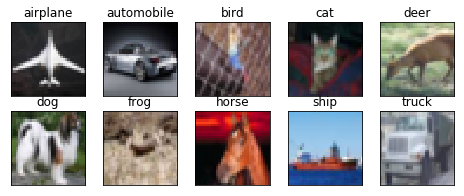

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers.merge import concatenate

dropout_rate = 0.5

# This returns a tensor
inputs = Input(shape=(32,32,3))

#Depthwise seperable convolution
layer1 = SeparableConv2D(8, (5,5), activation = 'relu', padding = 'same')(inputs)
layer1 = BatchNormalization()(layer1)
layer1 = Dropout(rate = 1-dropout_rate)(layer1)

#Normal convolution
layer2 = Convolution2D(8, (5,5), activation = 'relu', padding = 'same')(layer1)
layer2 = BatchNormalization()(layer2)
layer2 = Dropout(rate = 1-dropout_rate)(layer2)

#Normal convolution
layer3_1 = Convolution2D(8, (5,5), activation = 'relu', padding = 'same')(layer2)
layer3_1 = BatchNormalization()(layer3_1)
layer3_1 = Dropout(rate = 1-dropout_rate)(layer3_1)

#Layer 3 skip connections concatenate
layer3 = concatenate([layer3_1, layer1])

#Depthwise seperable convolution
layer4_1 = SeparableConv2D(8, (5,5), activation = 'relu', padding = 'same')(layer3)
layer4_1 = BatchNormalization()(layer4_1)
layer4_1 = Dropout(rate = 1-dropout_rate)(layer4_1)

#Layer 4 skip connections merge
layer4 = concatenate([layer4_1, layer1])

#Transition block ( Max pooling layer + 1x1 convolution )
layer5 = MaxPooling2D(pool_size=(2, 2), strides = 1, padding = 'same')(layer4)
layer5 = BatchNormalization()(layer5)
layer5 = Dropout(rate = 1-dropout_rate)(layer5)

#Depthwise seperable convolution
layer6_1 = SeparableConv2D(8, (3,3), activation = 'relu', padding = 'same')(layer5)
layer6_1 = BatchNormalization()(layer6_1)
layer6_1 = Dropout(rate = 1-dropout_rate)(layer6_1)

#Layer 6 skip connections concatenate
layer6 = concatenate([layer6_1, layer4, layer1 ] )

#Normal convolution
layer7_1 = Convolution2D(8, (5,5), activation = 'relu', padding = 'same')(layer6)
layer7_1 = BatchNormalization()(layer7_1)
layer7_1 = Dropout(rate = 1-dropout_rate)(layer7_1)

#Layer 7 skip connections concatenate
layer7 = concatenate([layer7_1, layer6_1, layer4, layer3])

#Depthwise seperable convolution
layer8_1 = SeparableConv2D(8, (3,3), activation = 'relu', padding = 'same')(layer7)
layer8_1 = BatchNormalization()(layer8_1)
layer8_1 = Dropout(rate = 1-dropout_rate)(layer8_1)

#Layer 8 skip connections concatenate
layer8 = concatenate([layer8_1, layer6_1, layer4_1, layer3])

#Depthwise seperable convolution
layer9_1 = SeparableConv2D(8, (5,5), activation = 'relu', padding = 'same')(layer8)
layer9_1 = BatchNormalization()(layer9_1)
layer9_1 = Dropout(rate = 1-dropout_rate)(layer9_1)

#Layer 9 skip connections concatenate
layer9 = concatenate([ layer9_1, layer8_1, layer6_1, layer3, layer1 ])

#Max pooling layer
layer10_1 = MaxPooling2D(pool_size=(2, 2), strides = 1, padding = 'same')(layer9)
layer10_1 = BatchNormalization()(layer10_1)
layer10_1 = Dropout(rate = 1-dropout_rate)(layer10_1)

#Layer 10 skip connections concatenate
layer10 = concatenate([layer10_1, layer7_1] )

#Normal convolution
layer11_1 = Convolution2D(8, (5,5), activation = 'relu', padding = 'same')(layer10)
layer11_1 = BatchNormalization()(layer11_1)
layer11_1 = Dropout(rate = 1-dropout_rate)(layer11_1)

#Layer 11 skip connections concatenate
layer11 = concatenate([layer11_1, layer8_1, layer4_1, layer2] )

#Depthwise seperable convolution
layer12_1 = SeparableConv2D(8, (5,5), activation = 'relu', padding = 'same')(layer11)
layer12_1 = BatchNormalization()(layer12_1)
layer12_1 = Dropout(rate = 1-dropout_rate)(layer12_1)

#Layer 12 skip connections concatenate
layer12 = concatenate([layer12_1, layer11_1, layer6_1, layer3, layer2])

#Normal convolution
layer13_1 = Convolution2D(8, (3,3), activation = 'relu', padding = 'same')(layer12)
layer13_1 = BatchNormalization()(layer13_1)
layer13_1 = Dropout(rate = 1-dropout_rate)(layer13_1)

#Layer 13 skip connections concatenate
layer13 = concatenate([layer13_1, layer12_1, layer8_1, layer6_1, layer4_1, layer3, layer1])

#Depthwise seperable convolution
layer14_1 = SeparableConv2D(8, (5,5), activation = 'relu', padding = 'same')(layer13)
layer14_1 = BatchNormalization()(layer14_1)
layer14_1 = Dropout(rate = 1-dropout_rate)(layer14_1)

#Layer14 skip connections concatenate
layer14 = concatenate( [layer14_1, layer12_1, layer8_1, layer4_1] )

#Normal convolution to convert to 10 outputs
layer15 = Convolution2D(10, (32,32), activation = 'relu')(layer14)

layer16 = Flatten()(layer15)
layer_output = Activation('softmax')(layer16)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Implemented all the layers and skip connections as given in the [ENAS Paper](https://arxiv.org/pdf/1802.03268.pdf). 

2 things:

1. Used 8 kernels at each layer largely due to time constraints. If I had used more kernels, then I might have reached a better training and validation accuracy.
2. Dropout of 0.5
<br>I initially started out with a dropout rate of 0.15 and LR of 0.003. However with those params neither the train nor validation accuracy changed. I noticed this issue in the assignment 6B as well. I tweaked both the dropout rate and learning rate. I later realised the learning rate being too high was the main issue. A dropout rate of 0.5 is really high and I could have brought down the droput rate back to 0.15 or so if I ran a few more experiments.

In [0]:
model = Model(inputs = inputs, outputs = layer_output)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_1 (SeparableCo (None, 32, 32, 8)    107         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 8)    32          separable_conv2d_1[0][0]         
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 32, 32, 8)    0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_1 (

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 4e-05.
390/390 [==============================] - 34s 88ms/step - loss: 2.3244 - acc: 0.1747 - val_loss: 2.7041 - val_acc: 0.1755

Epoch 00001: val_acc improved from -inf to 0.17550, saving model to weights.variety_convolutions.best.hdf5
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 3.9604e-05.
390/390 [==============================] - 30s 76ms/step - loss: 2.1861 - acc: 0.2618 - val_loss: 2.5906 - val_acc: 0.2536

Epoch 00002: val_acc improved from 0.17550 to 0.25360, saving model to weights.variety_convolutions.best.hdf5
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 3.92157e-05.
390/390 [==============================] - 28s 73ms/step - loss: 2.0832 - acc: 0.3127 - val_loss: 2.2418 - val_acc: 0.3227

Epoch 00003: val_acc improved from 0.25360 to 0.32270, saving model to weights.variety_convolutions.best.hdf5
Epoch 4/100

Epoch 00004: LearningRateScheduler se

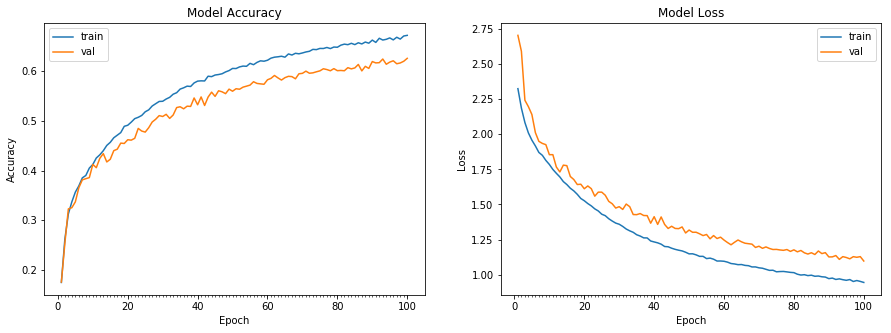

Accuracy on test data is: 62.59


In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.00004 * 1/(1 + 0.01 * epoch), 10)

filepath="weights.variety_convolutions.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]
# callbacks_list = [checkpoint]

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), callbacks = callbacks_list,
                                 verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

A couple of things:

1. With just 8 kernels at each layer, we achieved an validation accuracy of 62.59%. WIth more kernels, our network would be more expressive and we could do better.
2. The training and validation accuracy are quite close all the time. This means there isnt any gross overfiting or underfitting happening, which is a good thing.